In [2]:
import requests
import re
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import zip_longest
from bs4 import BeautifulSoup

# Scraping Data

In [3]:
page = int(input("Enter The Number of Pages you want to extract data from it : "))
for p in range(1,page):

  url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{p}/'
  page = requests.get(url)

  class Webpage():
    def __init__(self,url):
      self.url = url
      self.Rate = []
      self.review_header = []
      self.Review = []
      self.recommended = []

    def getHtml(self):
      page = requests.get(self.url)
      src = page.content
      return src

    def scrapingData(self):
      s = self.getHtml()
      soup = BeautifulSoup(s,'lxml')
      all_review = soup.find_all('article')

      def info(all_review):
        # get Rates
        Total_Rate = all_review.find_all('span',{'itemprop':'ratingValue'})
        for i in range(len(Total_Rate)):
          t_rate = Total_Rate[i].text
        self.Rate.append(t_rate)

        # get Review_title
        review_title = all_review.find_all('h2',{'class':'text_header'})
        for i in range(len(Total_Rate)):
          Reivew_t = review_title[i].text
        self.review_header.append(Reivew_t)

        # get Review
        review = all_review.find_all("div",{"class":"text_content"})
        for i in range(len(Total_Rate)):
          Reivew_M = review[i].text
        self.Review.append(Reivew_M)

      # all info of table

        table	= all_review.find('table',{'class':'review-ratings'})

      # get recommended data
        recommended_val = table.find_all('td',{'class':'review-value'})[-1]
        recommended_value = recommended_val.text
        self.recommended.append(recommended_value)


      for n in range(len(all_review)-1):

        info(all_review[n])

      return self.Rate,self.Review,self.review_header,self.recommended

  webpage = Webpage(url)
  # sourse = webpage.getHtml()
  data = webpage.scrapingData()
  data_col = ['Total_Rate/10','Review','Review_Header','Recommended']
  file_list = [data[0],data[1],data[2],data[3]]
  exported = zip_longest(*file_list)
  with open(f"Half_British_Airway{p}.csv",'w') as myfile:
        writer = csv.writer(myfile)
        writer.writerow(data_col)
        writer.writerows(exported)

Enter The Number of Pages you want to extract data from it : 150


# Preparing Data

In [4]:
Data = []
page = int(input("ReEnter the Number of page \n NOTE: make sure you entered the same number of pages : "))
for i in range(1,page):
  data = pd.read_csv(f'/content/Half_British_Airway{i}.csv')
  Data.append(data)

data = pd.concat(Data,axis=0,ignore_index=True)

ReEnter the Number of page 
 NOTE: make sure you entered the same number of pages : 150


In [15]:
data

,Total_Rate/10,Review,Review_Header,Recommended
0,2,Not Verified | Horrible airline. Does not care...,"""5 hours and 30 mins but no meal""",no
1,1,Not Verified | I booked Premium Economy from I...,"""cancelled the rebooked flight""",no
2,1,✅ Trip Verified | A simple story with an unfor...,"""Zero empathy was shown""",no
3,4,✅ Trip Verified | Flight was delayed due to t...,"""pilot apologise at every step of the way""",no
4,8,Not Verified | Fast and friendly check in (to...,"""crew were always ready to top up drinks""",no
...,...,...,...,...
1634,1,✅ Verified Review | On the 13th June 2017 I t...,"""they are failing dismally""",no
1635,2,✅ Verified Review | I was flying back from Zu...,"""I will no longer pick BA""",no
1636,1,✅ Verified Review | Rome to Heathrow flight o...,"""BA has lost the plot""",no
1637,3,✅ Verified Review | Chennai to London. What a...,"""BA are going backwards""",no


# Preprocessing Data

In [16]:
data.describe()

,Total_Rate/10
count,1639.000000
mean,4.232459
std,3.207176
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,10.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Total_Rate/10  1639 non-null   int64 
 1   Review         1639 non-null   object
 2   Review_Header  1639 non-null   object
 3   Recommended    1639 non-null   object
dtypes: int64(1), object(3)
memory usage: 51.3+ KB


In [34]:
data[['Trip_Type','Review']] = data['Review'].str.split('|',expand=True)

In [35]:
data

,Total_Rate/10,Review,Review_Header,Recommended,Trip_Type
0,2,Horrible airline. Does not care about their c...,"""5 hours and 30 mins but no meal""",no,Not Verified
1,1,I booked Premium Economy from INV to LAX (via...,"""cancelled the rebooked flight""",no,Not Verified
2,1,A simple story with an unfortunate outcome th...,"""Zero empathy was shown""",no,✅ Trip Verified
3,4,Flight was delayed due to the inbound flight...,"""pilot apologise at every step of the way""",no,✅ Trip Verified
4,8,Fast and friendly check in (total contrast t...,"""crew were always ready to top up drinks""",no,Not Verified
...,...,...,...,...,...
1634,1,On the 13th June 2017 I travelled from Mykon...,"""they are failing dismally""",no,✅ Verified Review
1635,2,I was flying back from Zurich to Heathrow af...,"""I will no longer pick BA""",no,✅ Verified Review
1636,1,Rome to Heathrow flight on the 23rd June del...,"""BA has lost the plot""",no,✅ Verified Review
1637,3,"Chennai to London. What a mistake, I selecte...","""BA are going backwards""",no,✅ Verified Review


In [36]:
def Preprocssing_MissingValue(data):
  for col in data.columns:
    persentage_col_data = data[col].isnull().sum()/len(data) *100
    if persentage_col_data >= 70 :
      data = data.drop(columns=col)
    elif 70 > persentage_col_data > 30 :
      if isinstance(data[col],str):
        data[col].fillna(method='ffill')
      elif isinstance(data[col],int):
        data[col].fillna(data[col].mean())
    elif 30 > persentage_col_data :
      data.dropna(inplace=True)
    elif persentage_col_data == 0:
      pass

  return data

In [37]:
data = Preprocssing_MissingValue(data)

In [38]:
data

,Total_Rate/10,Review,Review_Header,Recommended,Trip_Type
0,2,Horrible airline. Does not care about their c...,"""5 hours and 30 mins but no meal""",no,Not Verified
1,1,I booked Premium Economy from INV to LAX (via...,"""cancelled the rebooked flight""",no,Not Verified
2,1,A simple story with an unfortunate outcome th...,"""Zero empathy was shown""",no,✅ Trip Verified
3,4,Flight was delayed due to the inbound flight...,"""pilot apologise at every step of the way""",no,✅ Trip Verified
4,8,Fast and friendly check in (total contrast t...,"""crew were always ready to top up drinks""",no,Not Verified
...,...,...,...,...,...
1634,1,On the 13th June 2017 I travelled from Mykon...,"""they are failing dismally""",no,✅ Verified Review
1635,2,I was flying back from Zurich to Heathrow af...,"""I will no longer pick BA""",no,✅ Verified Review
1636,1,Rome to Heathrow flight on the 23rd June del...,"""BA has lost the plot""",no,✅ Verified Review
1637,3,"Chennai to London. What a mistake, I selecte...","""BA are going backwards""",no,✅ Verified Review


# Data Visualization

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10062 (\N{NEGATIVE SQUARED CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


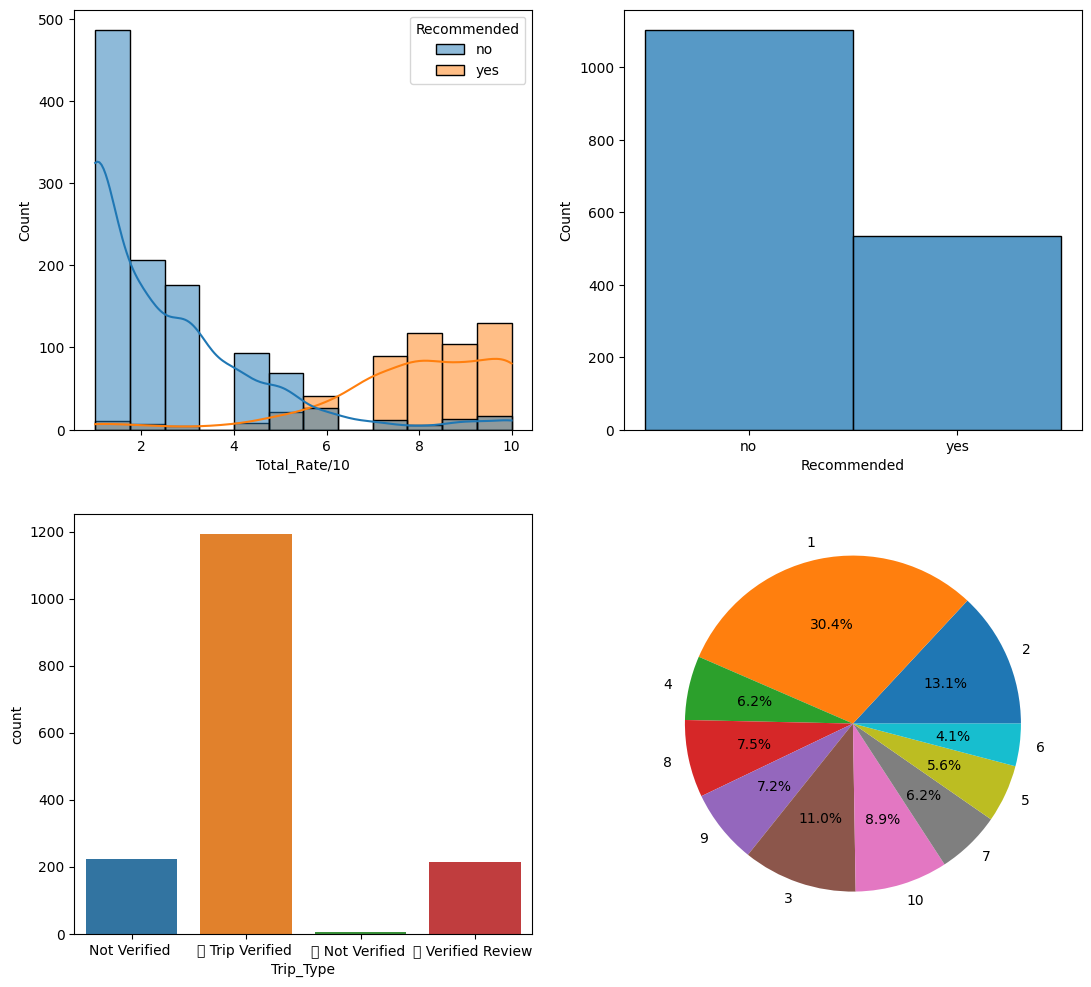

In [46]:
pers = [round(len(data[data['Total_Rate/10']==rate])/len(data)*100,2) for rate in data['Total_Rate/10'].unique()]
fig , ax = plt.subplots(2,2,figsize=(13,12))
sns.histplot(data,x='Total_Rate/10',hue='Recommended',kde=True,ax=ax[0][0])
sns.histplot(data,x='Recommended',ax=ax[0][1])
sns.countplot(data,x='Trip_Type',ax=ax[1][0])
plt.pie(pers,labels=data['Total_Rate/10'].unique(),autopct='%1.1f%%')
plt.show()